
<br><br>

### Considere o dataset abaixo:

In [1]:
import pandas as pd
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



In [2]:
# Parte 1

def divide_df(df):

    x = float(input('Digite o percentual que deseja disponibilizar para os dados de treino'))/100 #x recebe uma variável númerica
    y = int(df.shape[0] * x) #y é resultante da multiplicação do número de linhas do df original por x/100
    
    df_treino = df.head(y) #O df_treino terá o número de linhas =y
    df_teste = df[df_treino.shape[0]:df.shape[0]] #o df_teste receberá as linhas restantes
    
    print()   
    print('O Dataframe original possui',df.shape[0],'linhas.')

    print()
    print('Foi disponibilizado',x*100,'% dos dados do DataFrame original para treino, sendo',df_treino.shape[0],'linhas.')
    
    print()
    print('Restaram',100-(x*100),'% dos dados do DataFrame original para teste, sendo',df_teste.shape[0],'linhas.')
    
    return df_treino, df_teste

In [3]:
df_treino, df_teste = divide_df(df = df)

display(df_treino, df_teste)

Digite o percentual que deseja disponibilizar para os dados de treino70

O Dataframe original possui 2460 linhas.

Foi disponibilizado 70.0 % dos dados do DataFrame original para treino, sendo 1722 linhas.

Restaram 30.0 % dos dados do DataFrame original para teste, sendo 738 linhas.


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
...,...,...,...,...,...
1717,2.0,33.214999,66.554431,7.0,5
1718,4.0,27.379961,92.088951,3.0,279
1719,1.0,1.921977,24.877278,3.0,99
1720,1.0,27.552167,94.877554,2.0,248


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1722,1.0,32.142413,78.007421,6.0,12
1723,4.0,19.595819,90.968914,6.0,296
1724,5.0,17.063139,86.412978,2.0,427
1725,2.0,14.741844,90.977796,7.0,272
1726,3.0,6.364912,47.630039,9.0,65
...,...,...,...,...,...
2455,1.0,3.507206,56.070224,1.0,231
2456,4.0,28.222931,46.858543,3.0,18
2457,1.0,13.055995,87.372664,9.0,217
2458,2.0,22.632517,46.170517,6.0,42


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df.corr()[['crimes']]*100

,crimes
ind_pop_cid,6.723656
perc_pol,-37.792940
taxa_crim,57.865867
nivel_ed,-20.076215
crimes,100.000000


In [17]:
df.corr(method ='pearson')


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
ind_pop_cid,1.000000,0.016876,-0.072930,-0.000852,0.067237
perc_pol,0.016876,1.000000,0.399212,-0.055423,-0.377929
taxa_crim,-0.072930,0.399212,1.000000,0.097896,0.578659
nivel_ed,-0.000852,-0.055423,0.097896,1.000000,-0.200762
crimes,0.067237,-0.377929,0.578659,-0.200762,1.000000


#### Escolhi a variável perc_pol (Percentual de policiais ativos na cidade) pois para mim faz muito sentido o número de crimes em uma cidade ser menor no caso do percentual de policiais ativos na cidade ser alto e o contrário também se aplica, ou seja, em uma cidade com poucos policiais, a quantidade de crimes tende a ser maior. Resolvi então investigar.

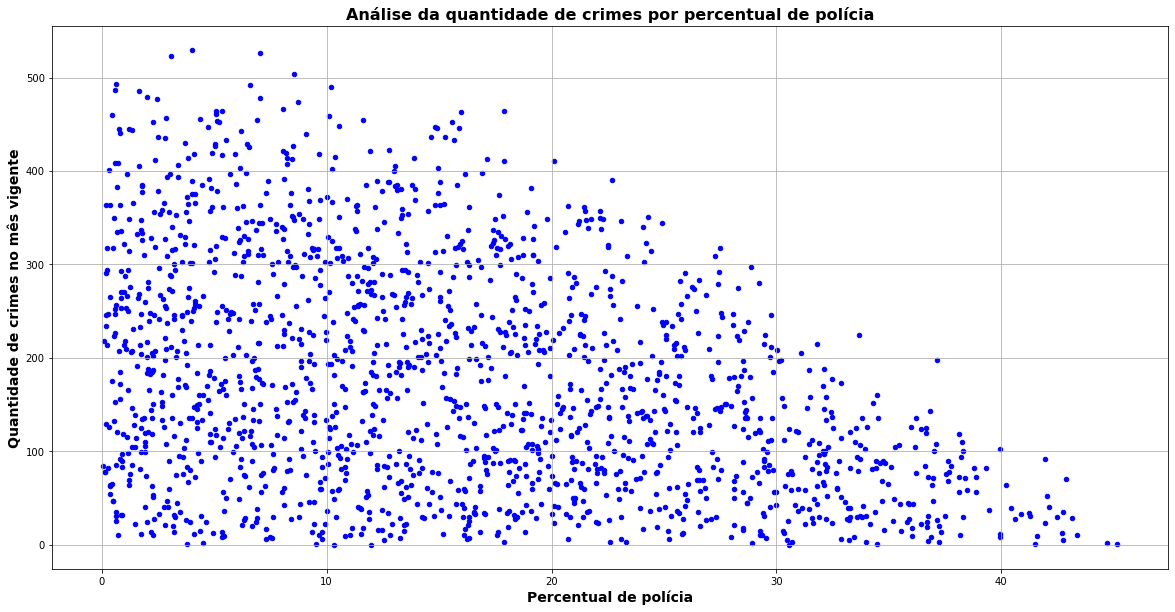

In [6]:
# Parte 2.1

plt.figure(figsize=[20,10])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por percentual de polícia", fontweight = 'bold', fontsize = 16)
plt.xlabel("Percentual de polícia", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.grid()
plt.show()


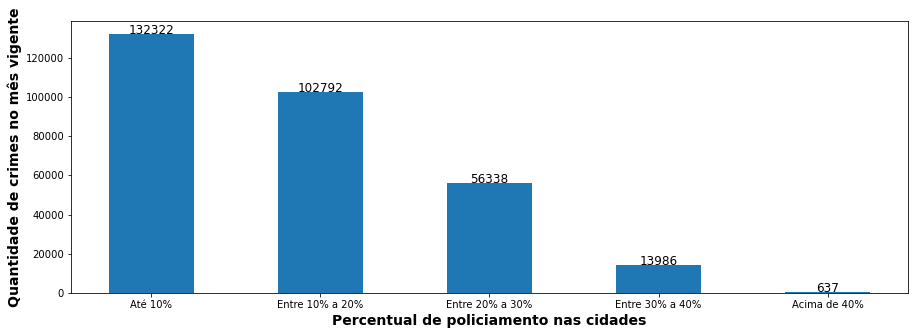

In [7]:
x1 = df_treino.crimes[df_treino.perc_pol < 10].sum()
x2 = df_treino.crimes[(df_treino.perc_pol >= 10) & (df_treino.perc_pol < 20)].sum()
x3 = df_treino.crimes[(df_treino.perc_pol >= 20) & (df_treino.perc_pol < 30)].sum()
x4 = df_treino.crimes[(df_treino.perc_pol >= 30) & (df_treino.perc_pol < 40)].sum()
x5 = df_treino.crimes[df_treino.perc_pol > 40].sum()

lista_perc_pol = [x1,x2,x3,x4,x5]
eixo_x = ['Até 10%', 'Entre 10% a 20%','Entre 20% a 30%','Entre 30% a 40%','Acima de 40%']
x_pos = np.arange(len(eixo_x))

plt.figure(figsize=[15,5])
plt.bar(eixo_x,lista_perc_pol,width = 0.5)
plt.xlabel("Percentual de policiamento nas cidades", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)

for i in range(len(x_pos)):
        plt.text(i, lista_perc_pol[i], lista_perc_pol[i], ha = 'center',size=12)

plt.show()

#### Olhando graficamente, vemos no primeiro gráfico que a dispersão dos pontos é menor em regiões com maior percentual de policiais ativos e no segundo gráfico vemos também que a quantidade de crimes é menor conforme o percentual aumenta.

#### Análise por regressão linear

In [8]:
def regressao_linear(x,y):
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    x = x.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    lm.fit(x,y)
    ypred_lm = lm.predict(x)
    return ypred_lm

In [9]:
ypred_lm = regressao_linear(x = df_treino['perc_pol'], y = df_treino['crimes'])
ypred_lm

array([[214.7838592 ],
       [140.62574326],
       [160.65587385],
       ...,
       [237.3838519 ],
       [127.33487449],
       [112.66428483]])

In [14]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [15]:
RMSE(y = df_treino['crimes'].values.reshape(-1,1), y_pred = ypred_lm)

111.48935111645724

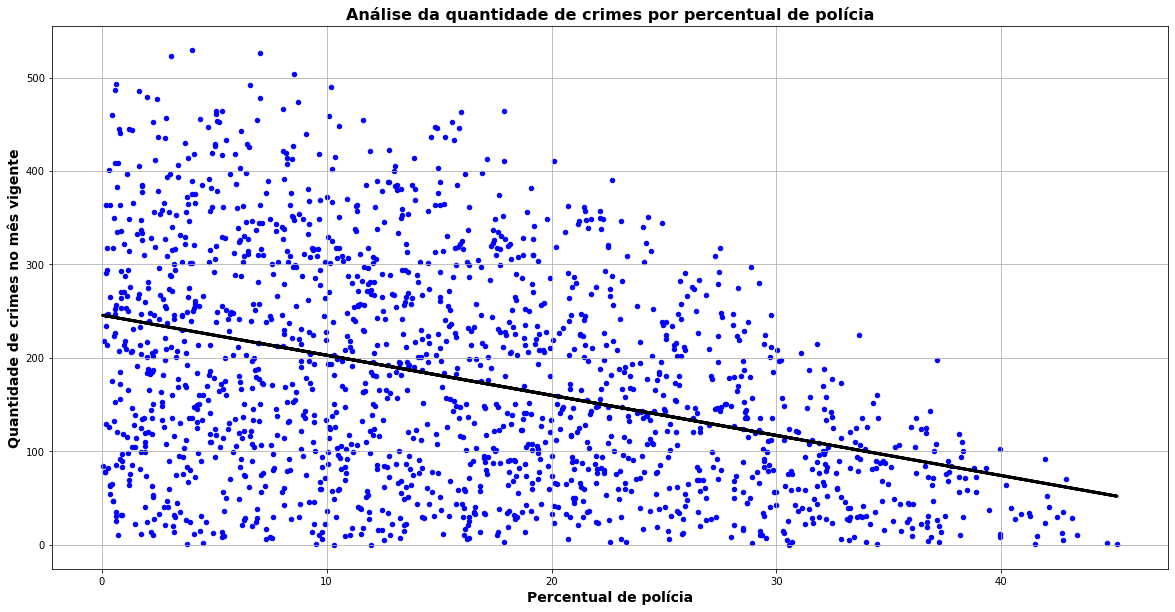

In [16]:
plt.figure(figsize=[20,10])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por percentual de polícia", fontweight = 'bold', fontsize = 16)
plt.xlabel("Percentual de polícia", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)

plt.plot(df_treino['perc_pol'], ypred_lm, c = 'black', lw = 3)
plt.grid()
plt.show()

#### Vemos que a análise por regressão linear comprova que a quantidade de crimes diminui conforme o percentual de polícia ativa aumenta. Vamos testar o modelo no df_teste para verificar se está sofrendo do overfitting ou underfitting.

In [24]:
ypred_lm_teste = regressao_linear(x = df_teste['perc_pol'], y = df_teste['crimes'])


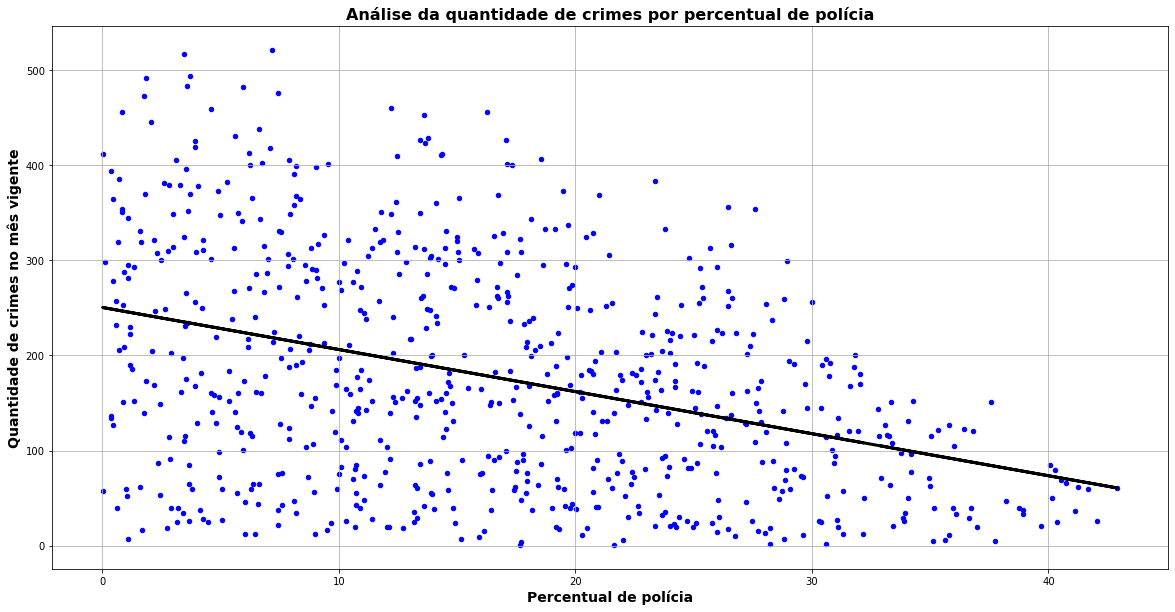

In [25]:
plt.figure(figsize=[20,10])
plt.scatter(df_teste['perc_pol'], df_teste['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por percentual de polícia", fontweight = 'bold', fontsize = 16)
plt.xlabel("Percentual de polícia", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)

plt.plot(df_teste['perc_pol'], ypred_lm_teste, c = 'black', lw = 3)
plt.grid()
plt.show()

#### O modelo parece ter se adaptado bem aos dados de teste e refletiu também a análise de que quanto maior o percentual de policiais ativos, menor o número de crimes.

#### Análise por KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
#Remodelando os dados
x = df_treino['perc_pol'].values.reshape(-1,1)
y = df_treino['crimes'].values.reshape(-1,1)

#### Vamos testar o KNN com até 10 vizinhos para vermos o RMSE de cada um

In [28]:
for i in np.arange(1,11,1):
    knn = KNeighborsRegressor(n_neighbors = i).fit(x, y)
    rmse_knn = np.round(RMSE(y = y, y_pred = knn.predict(x)), 2)
    print("RMSE do KNN com",i,"vizinhos:", rmse_knn)

RMSE do KNN com 1 vizinhos: 0.0
RMSE do KNN com 2 vizinhos: 77.72
RMSE do KNN com 3 vizinhos: 89.85
RMSE do KNN com 4 vizinhos: 94.89
RMSE do KNN com 5 vizinhos: 98.2
RMSE do KNN com 6 vizinhos: 100.45
RMSE do KNN com 7 vizinhos: 102.17
RMSE do KNN com 8 vizinhos: 102.81
RMSE do KNN com 9 vizinhos: 103.52
RMSE do KNN com 10 vizinhos: 104.16


In [29]:
knn = KNeighborsRegressor(n_neighbors = 10).fit(x, y)
ypred_knn = knn.predict(x)
y_pred_knn.shape

NameError: name 'y_pred_knn' is not defined

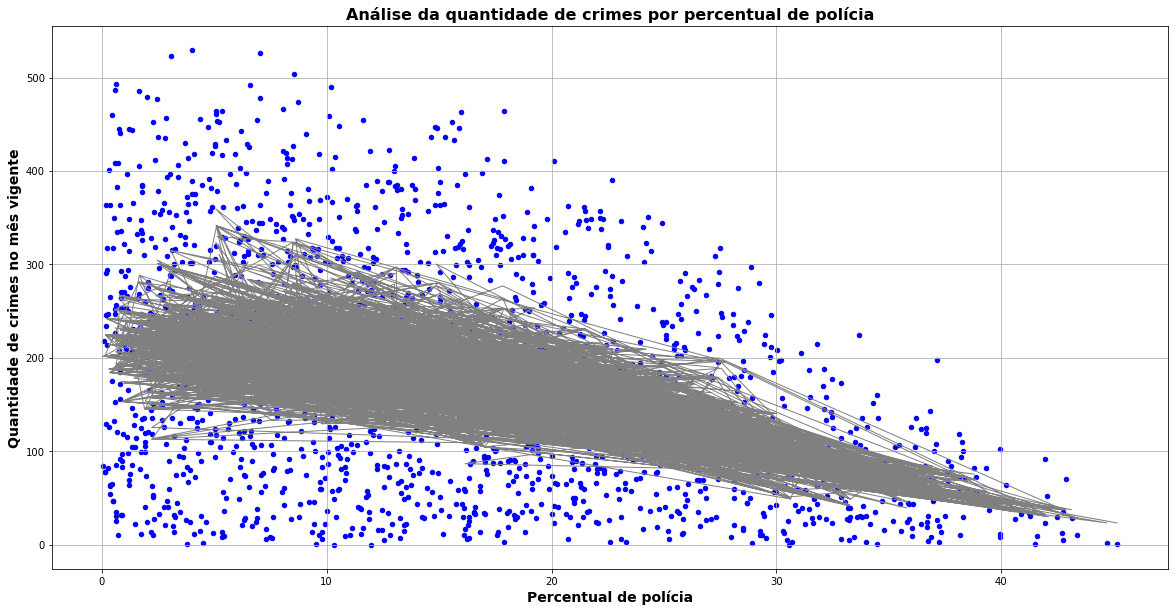

In [30]:
plt.figure(figsize=[20,10])
plt.scatter(df_treino['perc_pol'], df_treino['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por percentual de polícia", fontweight = 'bold', fontsize = 16)
plt.xlabel("Percentual de polícia", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)

plt.plot(x, ypred_knn, c = 'gray', lw = 1)
plt.grid()
plt.show()

#### A análise por KNN me fez perceber que há limitações com relação a este tipo de análise em Dataframes com grandes quantidades de dados, gerando um gráfico poluído e não conclusivo.

In [31]:
df_treino.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


In [32]:
#Parte 2.2
#Análise da quantidade de crimes através do índice de tamanho da cidade (ind_pop_cid)

sorted(df_treino.ind_pop_cid.unique())

[1.0, 2.0, 3.0, 4.0, 5.0]

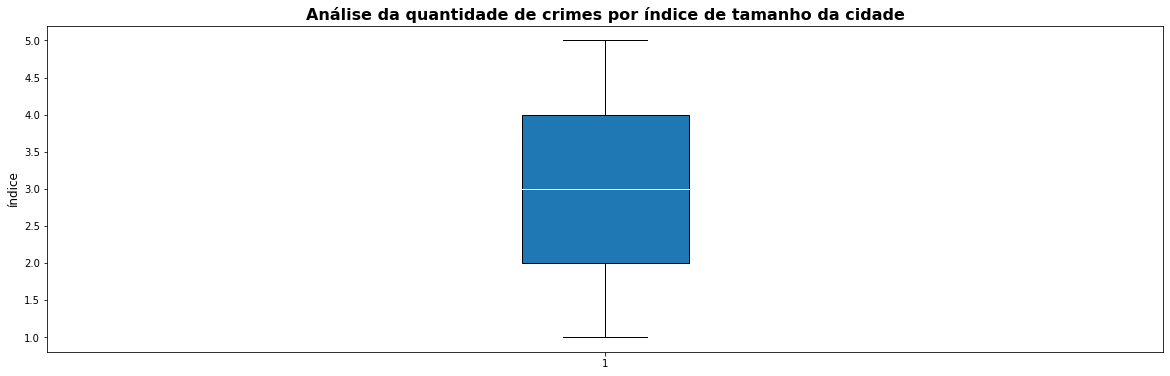

In [33]:
plt.figure(figsize=[20,6])
plt.title("Análise da quantidade de crimes por índice de tamanho da cidade", fontweight = 'bold', fontsize = 16)
plt.boxplot(df_treino['ind_pop_cid'], patch_artist = True, boxprops=dict(color='black'),medianprops=dict(color='white'))
plt.ylabel('índice', {'fontsize': 12}) #legenda no eixo x

plt.show()

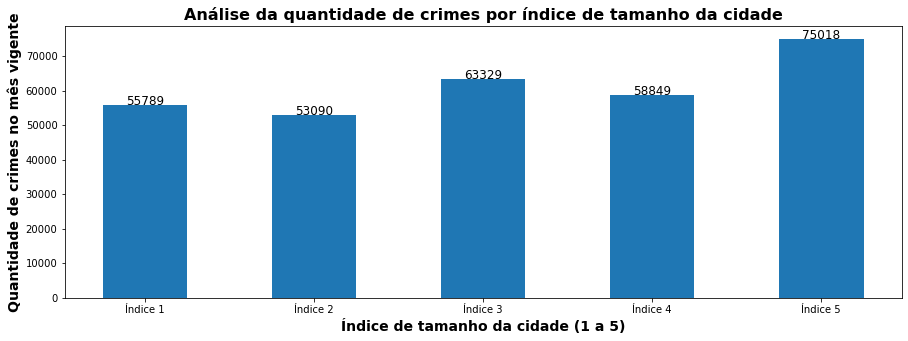

In [34]:
x1 = df_treino.crimes[df_treino.ind_pop_cid == 1.0].sum()
x2 = df_treino.crimes[df_treino.ind_pop_cid == 2.0].sum()
x3 = df_treino.crimes[df_treino.ind_pop_cid == 3.0].sum()
x4 = df_treino.crimes[df_treino.ind_pop_cid == 4.0].sum()
x5 = df_treino.crimes[df_treino.ind_pop_cid == 5.0].sum()

lista_ind_pop_cid = [x1,x2,x3,x4,x5]
eixo_x = ['Índice 1', 'Índice 2','Índice 3','Índice 4','Índice 5']
x_pos = np.arange(len(eixo_x))

plt.figure(figsize=[15,5])
plt.title("Análise da quantidade de crimes por índice de tamanho da cidade", fontweight = 'bold', fontsize = 16)
plt.bar(eixo_x,lista_ind_pop_cid,width = 0.5)
plt.xlabel("Índice de tamanho da cidade (1 a 5)", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)

for i in range(len(x_pos)):
        plt.text(i, lista_ind_pop_cid[i], lista_ind_pop_cid[i], ha = 'center',size=12)

plt.show()

#### Olhando graficamente, não parece ter uma relação clara entre o tamanho da cidade e o número de crimes, pois de 1 a 4 os valores são razoavelmente próximos, tendo apenas um destaque maior para o índice 5, porém não tão considerável a ponto de afirmarmos que o índice alto influencia na quantidade de crimes. Vamos plotar o modelo e ver se a análise primária sofrerá alterações.

In [35]:
y_pred_indice = regressao_linear(x = df_treino['ind_pop_cid'], y = df_treino['crimes'])
y_pred_indice

array([[164.51562567],
       [164.51562567],
       [164.51562567],
       ...,
       [164.51562567],
       [164.51562567],
       [170.90348114]])

In [36]:
RMSE(y = df_treino['crimes'].values.reshape(-1,1), y_pred = y_pred_indice)

120.05598128865911

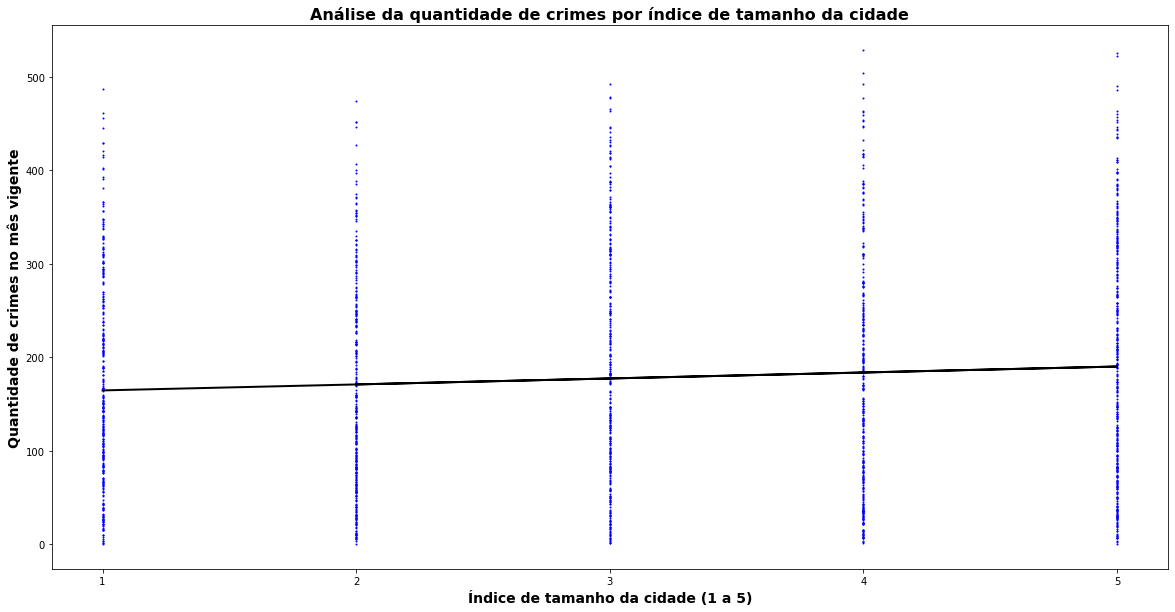

In [37]:
plt.figure(figsize=[20,10])
plt.scatter(df_treino['ind_pop_cid'], df_treino['crimes'], s = 1, c = 'blue')
plt.title("Análise da quantidade de crimes por índice de tamanho da cidade", fontweight = 'bold', fontsize = 16)
plt.xlabel("Índice de tamanho da cidade (1 a 5)", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.xticks(range(1,6))

plt.plot(df_treino['ind_pop_cid'], y_pred_indice, c = 'black', lw = 2)
plt.show()

#### A análise mostrou que há uma pequena tendência de haver mais crimes em índices maiores, mas não é possível afirmar que o índice tem tanto impacto quanto o percentual de políciais por exemplo.

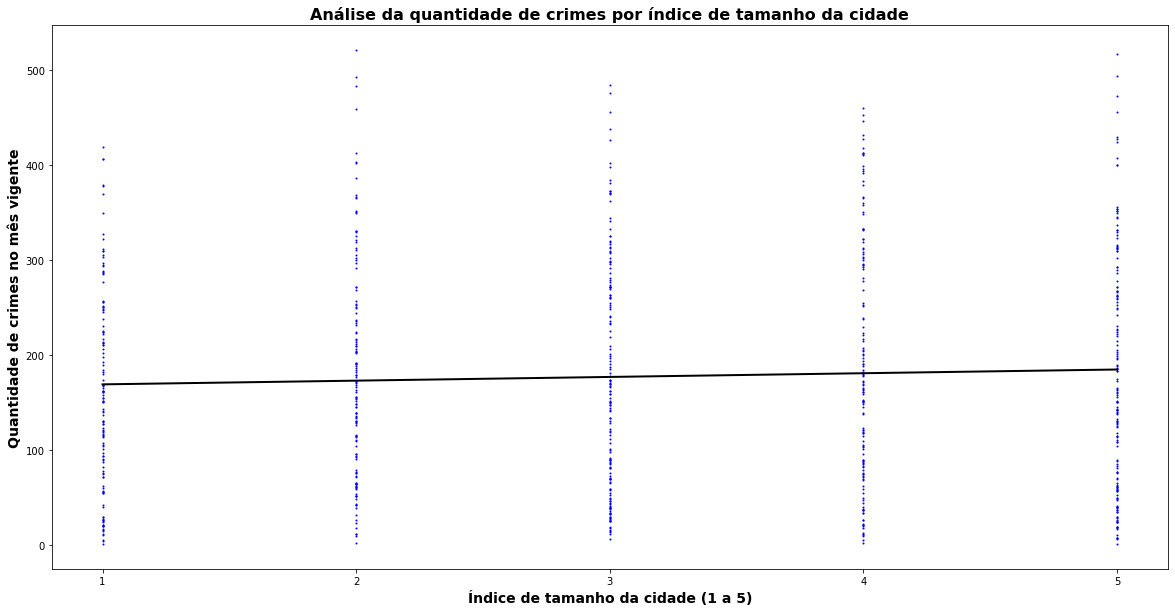

In [38]:
#Análise no df_teste
y_pred_indice_teste = regressao_linear(x = df_teste['ind_pop_cid'], y = df_teste['crimes'])

plt.figure(figsize=[20,10])
plt.scatter(df_teste['ind_pop_cid'], df_teste['crimes'], s = 1, c = 'blue')
plt.title("Análise da quantidade de crimes por índice de tamanho da cidade", fontweight = 'bold', fontsize = 16)
plt.xlabel("Índice de tamanho da cidade (1 a 5)", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.xticks(range(1,6))

plt.plot(df_teste['ind_pop_cid'], y_pred_indice_teste, c = 'black', lw = 2)
plt.show()

#### Vemos que o modelo se adaptou bem ao df_teste e a conclusão foi a mesma, ou seja, não é possível afirmar que o tamanho da cidade afeta drasticamente a quantidade de crimes.

In [39]:
#Análise da quantidade de crimes através do nível educacional (nivel_ed)

sorted(df_treino.nivel_ed.unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

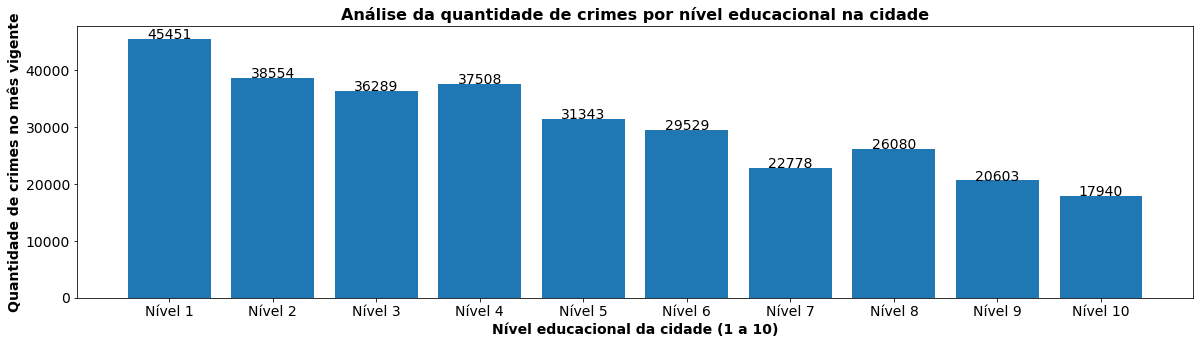

In [40]:
x1 = df_treino.crimes[df_treino.nivel_ed == 1.0].sum()
x2 = df_treino.crimes[df_treino.nivel_ed == 2.0].sum()
x3 = df_treino.crimes[df_treino.nivel_ed == 3.0].sum()
x4 = df_treino.crimes[df_treino.nivel_ed == 4.0].sum()
x5 = df_treino.crimes[df_treino.nivel_ed == 5.0].sum()
x6 = df_treino.crimes[df_treino.nivel_ed == 6.0].sum()
x7 = df_treino.crimes[df_treino.nivel_ed == 7.0].sum()
x8 = df_treino.crimes[df_treino.nivel_ed == 8.0].sum()
x9 = df_treino.crimes[df_treino.nivel_ed == 9.0].sum()
x10 = df_treino.crimes[df_treino.nivel_ed == 10.0].sum()

lista_nivel_ed = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
eixo_x = ['Nível 1', 'Nível 2','Nível 3','Nível 4','Nível 5','Nível 6','Nível 7','Nível 8','Nível 9','Nível 10',]
x_pos = np.arange(len(eixo_x))

plt.figure(figsize=[20,5])
plt.title("Análise da quantidade de crimes por nível educacional na cidade", fontweight = 'bold', fontsize = 16)
plt.bar(eixo_x,lista_nivel_ed,width = 0.8)
plt.xlabel("Nível educacional da cidade (1 a 10)", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.tick_params(labelsize = 14)

for i in range(len(x_pos)):
        plt.text(i, lista_nivel_ed[i], lista_nivel_ed[i], ha = 'center',size=14)

plt.show()

#### Vemos que para o nível educacional há uma redução no número de crimes do menor para o maior nível, ou seja, graficamente poderíamos já afirmar que faz sentido dizer que o nível de educação contribui para a segurança de uma cidade. Vamos continuar as investigações.

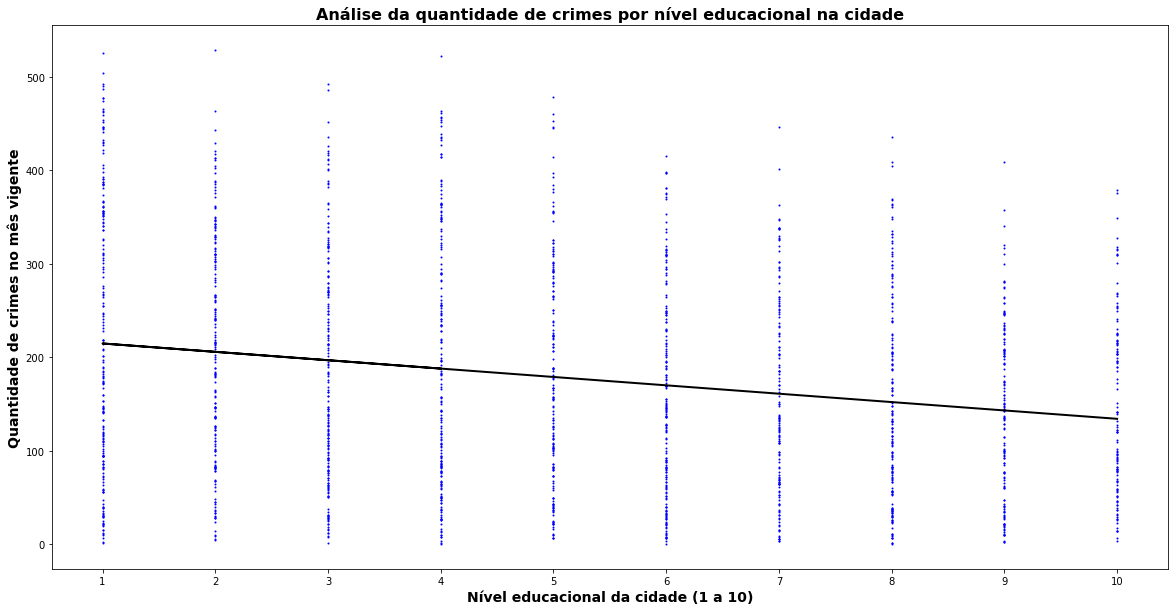

In [41]:
y_pred_nivel_ed = regressao_linear(x = df_treino['nivel_ed'], y = df_treino['crimes'])

plt.figure(figsize=[20,10])
plt.scatter(df_treino['nivel_ed'], df_treino['crimes'], s = 1, c = 'blue')
plt.title("Análise da quantidade de crimes por nível educacional na cidade", fontweight = 'bold', fontsize = 16)
plt.xlabel("Nível educacional da cidade (1 a 10)", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.xticks(range(1,11))

plt.plot(df_treino['nivel_ed'], y_pred_nivel_ed, c = 'black', lw = 2)
plt.show()

#### A análise de regressão linear comprovou a análise inicial e mostrou que há uma redução no número de crimes conforme o nível educacional aumenta.

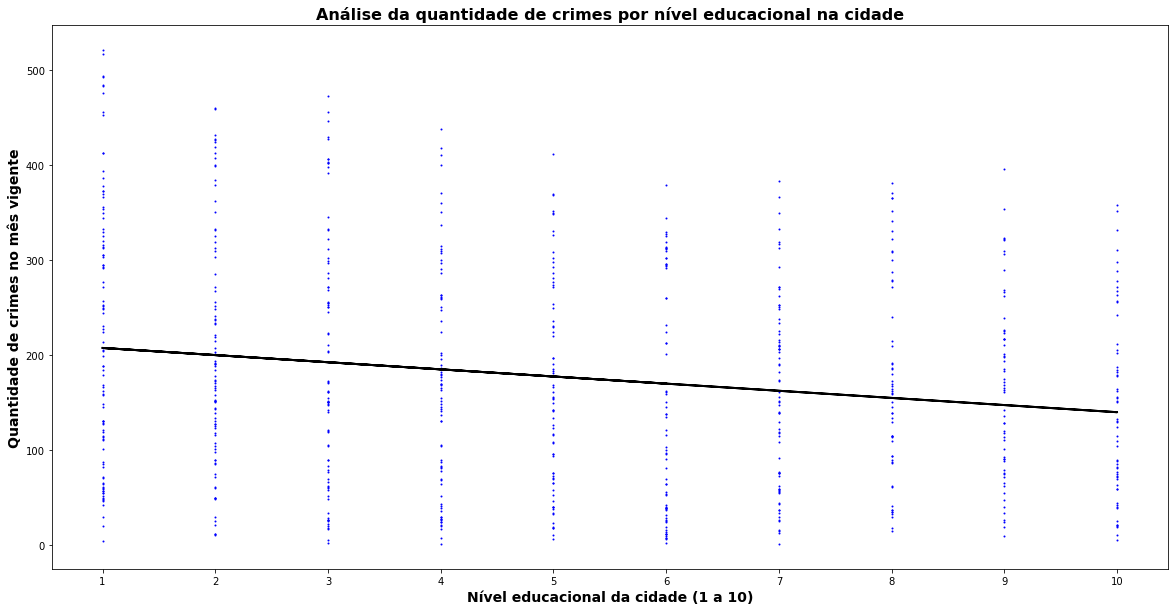

In [42]:
#Análise no df_teste

y_pred_nivel_ed_teste = regressao_linear(x = df_teste['nivel_ed'], y = df_teste['crimes'])

plt.figure(figsize=[20,10])
plt.scatter(df_teste['nivel_ed'], df_teste['crimes'], s = 1, c = 'blue')
plt.title("Análise da quantidade de crimes por nível educacional na cidade", fontweight = 'bold', fontsize = 16)
plt.xlabel("Nível educacional da cidade (1 a 10)", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.xticks(range(1,11))

plt.plot(df_teste['nivel_ed'], y_pred_nivel_ed_teste, c = 'black', lw = 2)
plt.show()

#### No df_teste a comprovação também foi validada, tendo os níveis educacionais maiores com menor ocorrência de crimes.

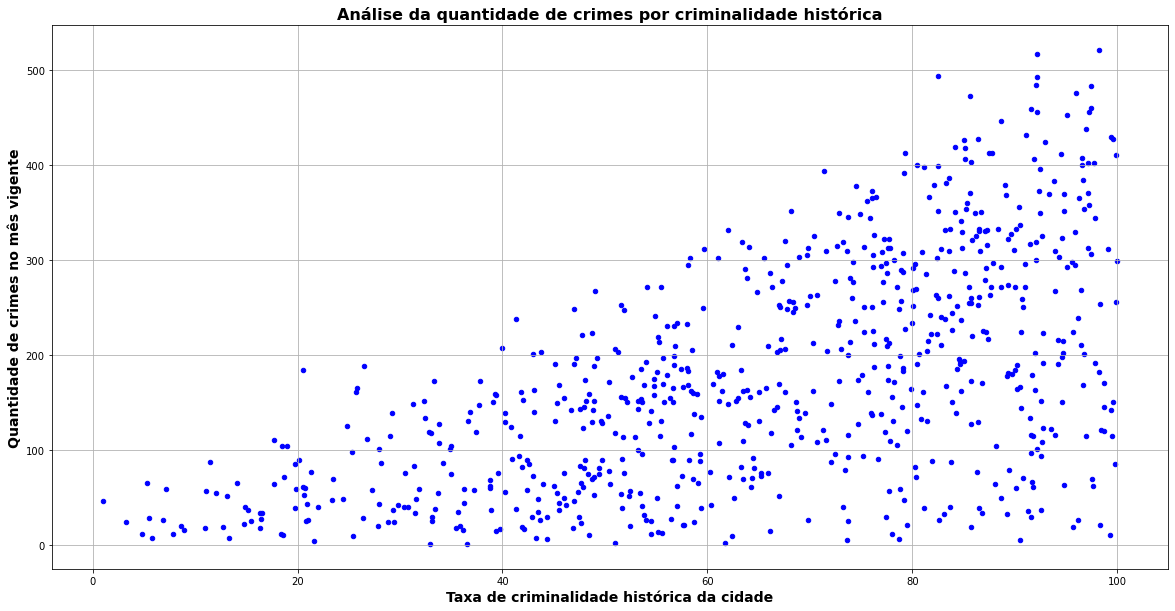

In [43]:
#Análise por taxa de criminalidade histórica da cidade 

plt.figure(figsize=[20,10])
plt.scatter(df_teste['taxa_crim'], df_teste['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por criminalidade histórica", fontweight = 'bold', fontsize = 16)
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.grid()
plt.show()

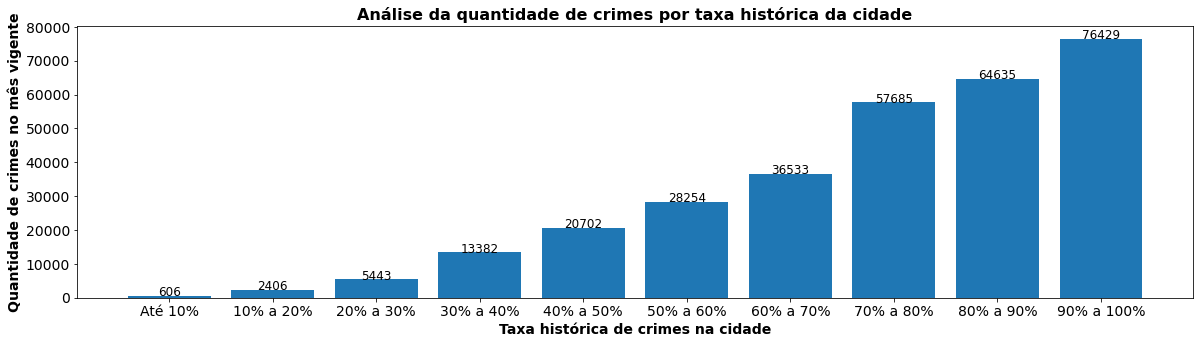

In [44]:
x1 = df_treino.crimes[df_treino.taxa_crim < 10].sum()
x2 = df_treino.crimes[(df_treino.taxa_crim >= 10) & (df_treino.taxa_crim < 20)].sum()
x3 = df_treino.crimes[(df_treino.taxa_crim >= 20) & (df_treino.taxa_crim < 30)].sum()
x4 = df_treino.crimes[(df_treino.taxa_crim >= 30) & (df_treino.taxa_crim < 40)].sum()
x5 = df_treino.crimes[(df_treino.taxa_crim >= 40) & (df_treino.taxa_crim < 50)].sum()
x6 = df_treino.crimes[(df_treino.taxa_crim >= 50) & (df_treino.taxa_crim < 60)].sum()
x7 = df_treino.crimes[(df_treino.taxa_crim >= 60) & (df_treino.taxa_crim < 70)].sum()
x8 = df_treino.crimes[(df_treino.taxa_crim >= 70) & (df_treino.taxa_crim < 80)].sum()
x9 = df_treino.crimes[(df_treino.taxa_crim >= 80) & (df_treino.taxa_crim < 90)].sum()
x10 = df_treino.crimes[(df_treino.taxa_crim >= 90) & (df_treino.taxa_crim <= 100)].sum()


lista_tx_hist = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
eixo_x = ['Até 10%', '10% a 20%','20% a 30%','30% a 40%','40% a 50%','50% a 60%','60% a 70%','70% a 80%','80% a 90%','90% a 100%',]
x_pos = np.arange(len(eixo_x))

plt.figure(figsize=[20,5])
plt.title("Análise da quantidade de crimes por taxa histórica da cidade", fontweight = 'bold', fontsize = 16)
plt.bar(eixo_x,lista_tx_hist,width = 0.8)
plt.xlabel("Taxa histórica de crimes na cidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.tick_params(labelsize = 14)

for i in range(len(x_pos)):
        plt.text(i, lista_tx_hist[i], lista_tx_hist[i], ha = 'center',size=12)

plt.show()

#### Vemos que a taxa de criminalidade histórica das cidades impactam grandemente nos crimes mais recentes, ou seja, quanto maior a taxa de crimes, maior a probabilidade de uma cidade ter muitos crimes no mês vigente. Vamos analisar com regressão linear.

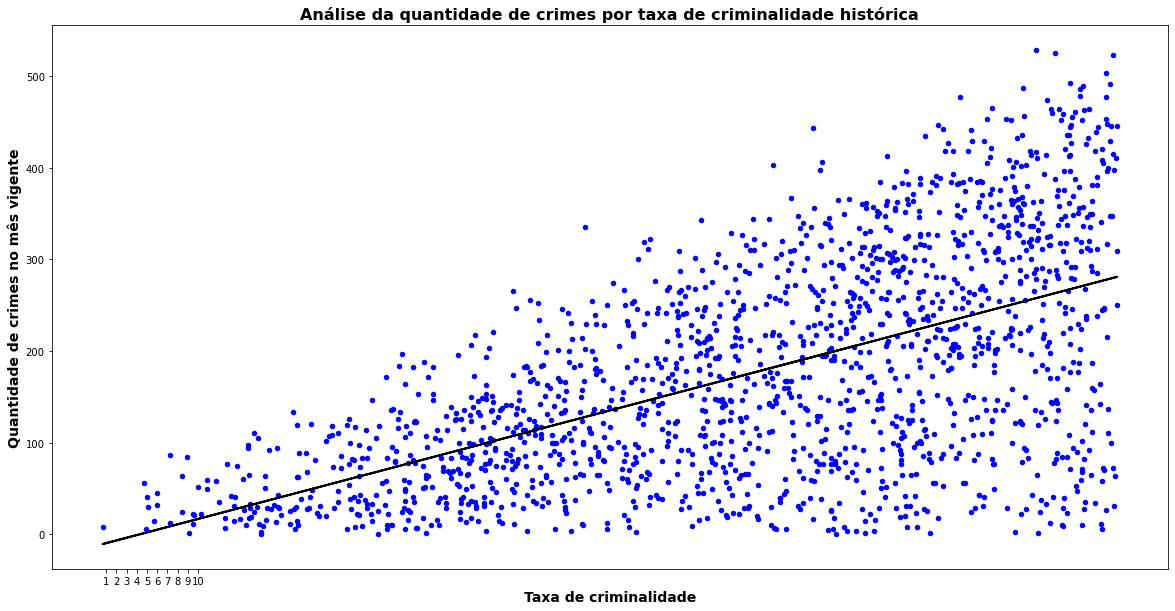

In [46]:
y_pred_taxa_crimes = regressao_linear(x = df_treino['taxa_crim'], y = df_treino['crimes'])

plt.figure(figsize=[20,10])
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por taxa de criminalidade histórica", fontweight = 'bold', fontsize = 16)
plt.xlabel("Taxa de criminalidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.xticks(range(1,11))

plt.plot(df_treino['taxa_crim'], y_pred_taxa_crimes, c = 'black', lw = 2)
plt.show()

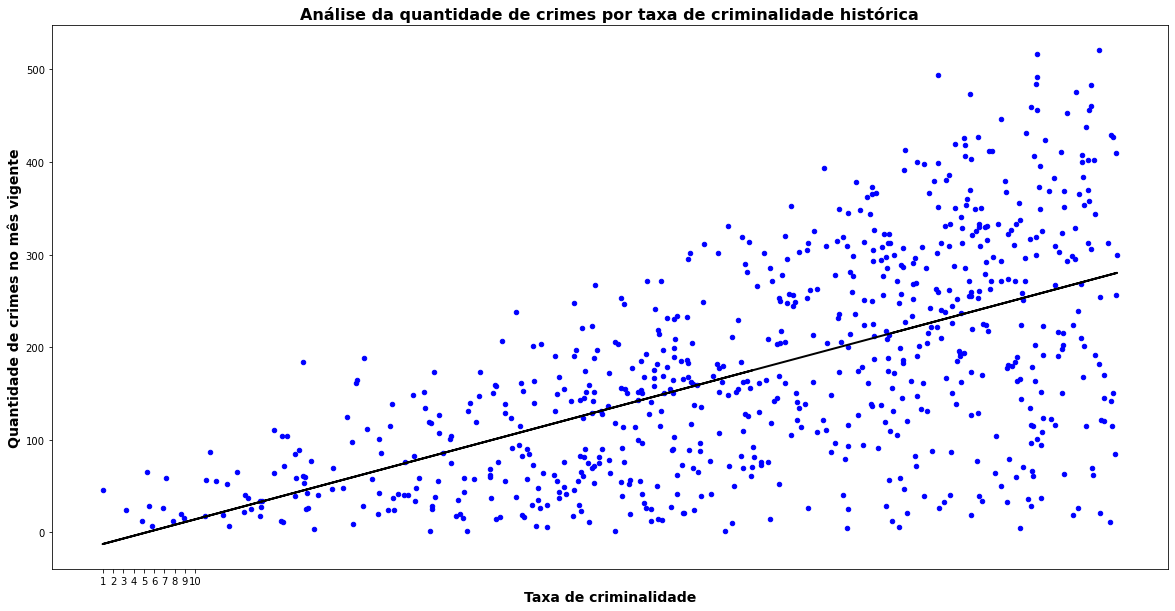

In [47]:
#Analise no df_teste

y_pred_taxa_crimes_teste = regressao_linear(x = df_teste['taxa_crim'], y = df_teste['crimes'])

plt.figure(figsize=[20,10])
plt.scatter(df_teste['taxa_crim'], df_teste['crimes'], s = 20, c = 'blue')
plt.title("Análise da quantidade de crimes por taxa de criminalidade histórica", fontweight = 'bold', fontsize = 16)
plt.xlabel("Taxa de criminalidade", fontweight = 'bold', fontsize = 14)
plt.ylabel("Quantidade de crimes no mês vigente", fontweight = 'bold', fontsize = 14)
plt.xticks(range(1,11))

plt.plot(df_teste['taxa_crim'], y_pred_taxa_crimes_teste, c = 'black', lw = 2)
plt.show()

#### A análise por regressão linear gerou um modelo que correspondeu bem aos dados no gráfico, mostrando que realmente há muita relevância na taxa de crimindalidade histórica em relação ao número de crimes atual.

In [49]:
df.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


#### Resumo de todas as análises feitas:

#### 1- A taxa de criminalidade histórica mostrou grande relevância para o número de crimes que ocorrem atualmente nas cidades. Isso significa que se uma cidade tem histórico de ser muito perigosa, tende a permanecer assim se nada for feito.

#### 2- O nível de policiamento tem grande relevância na quantidade de crimes cometidos. Quando uma cidade tem policiamento elevado, tende a ser mais segura e ter menos crimes.

#### 3- O nível educacional tem sim uma certa relevância na quantidade de crimes e mostra que se for feito um investimento na educação das pessoas, a cidade também tende a ganhar em segurança. Porém essa relevância não é tão grande quanto a taxa histórica e o nível de policiamento.

#### 4- O índice de tamanho da cidade não mostrou muita relevância na quantidade de crimes, visto que houveram cidades com tamanhos menores que tiveram muitos crimes. Mesmo que isso fosse um fator crítico, seria de difícil solução, pois não haveria uma forma de "diminuir" o tamanho de uma cidade para se ter menos crimes, sendo então mais viável investir nos fatores acima.